In [1]:
import matplotlib.pyplot as plt

from pytorch_grad_cam import GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM
from pytorch_grad_cam.utils.image import show_cam_on_image

import torch
from torchvision.models import resnet50
from torchvision import transforms

import numpy as np
from pytorch_grad_cam.utils.image import show_cam_on_image, deprocess_image, preprocess_image


from PIL import Image

tensor2pli = transforms.ToPILImage()
pli2tensor = transforms.ToTensor()

cuda = False

In [2]:
model = resnet50(pretrained=True)
target_layers = model.layer4[-1]

In [3]:
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

In [4]:
import cv2
import os
def get_image(path):
    with open(os.path.abspath(path), 'rb') as f:
        with Image.open(f) as img:
            return img.convert('RGB') 
i = ['resi','look','chicken_cow']

img = f"C:/Users/rober/OneDrive - Microsoft Student Partners/Semester11/bilder_einführung/{i[1]}.png"


rgb_img = get_image(img)
#rgb_img = cv2.imread('dog_cat.jfif', 1)[:, :, ::-1]
rgb_img = np.float32(rgb_img) / 255
input_tensor = preprocess_image(rgb_img,mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
print(rgb_img.shape)
input_tensor.shape
# Note: input_tensor can be a batch tensor with several images!

(1062, 1062, 3)


torch.Size([1, 3, 1062, 1062])

In [5]:
#input_tensor = input_tensor[:,:,:,150:]
#rgb_img = rgb_img[:,150:]

In [6]:
model.eval()
s = torch.nn.Softmax(dim=1)
out = s(model(input_tensor))

In [7]:
# Construct the CAM object once, and then re-use it on many images:
cam = GradCAM(model, target_layers, use_cuda=cuda)

# You can also use it within a with statement, to make sure it is freed,
# In case you need to re-create it inside an outer loop:
# with GradCAM(model=model, target_layers=target_layers, use_cuda=args.use_cuda) as cam:
#   ...

In [8]:
# Show top categories per image
top5_prob, top5_catid = torch.topk(out, 5)
for i in range(5):
    j = top5_catid[0,i].item()
    print(categories[j],top5_prob[0,i].item()*100,j)


wardrobe 1.7895683646202087 894
medicine chest 1.784214936196804 648
shower curtain 1.7143117263913155 794
crate 1.4143490232527256 519
tub 1.13615607842803 876


In [9]:
# If target_category is None, the highest scoring category
# will be used for every image in the batch.
# target_category can also be an integer, or a list of different integers
# for every image in the batch.
target_category = torch.argmax(out).item()

In [10]:
def showClass(cl):
    # You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
    grayscale_cam = cam(input_tensor=input_tensor, target_category=cl)
    # In this example grayscale_cam has only one image in the batch:
    grayscale_cam = 1-grayscale_cam[0, :]
    visualization = show_cam_on_image(rgb_img, grayscale_cam)
    plt.figure()
    #plt.title(f"{categories[cl]} -- id: {cl} -- {int(out[0,cl]*10000)/100} %")
    plt.title(f"{categories[cl]}",fontsize=20)
    plt.axis('off')
    #print(categories[j],top5_prob[0,i].item(),j)
    plt.imshow(tensor2pli(visualization)) 
#showClass(target_category)

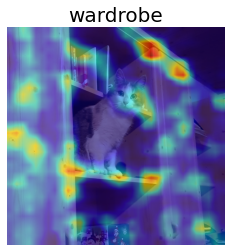

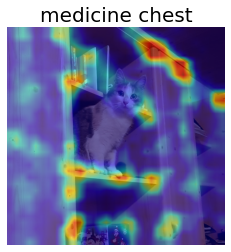

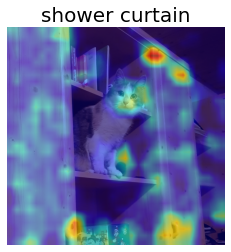

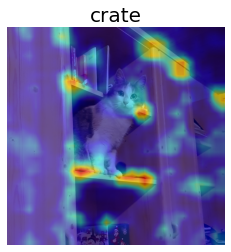

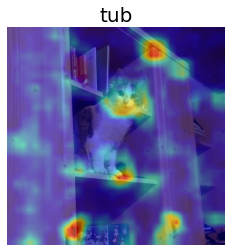

In [11]:
top5_prob, top5_catid = torch.topk(out, 5)
for i in range(5):
    j = top5_catid[0,i].item()
    #print(categories[j],top5_prob[0,i].item(),j)
    showClass(j)

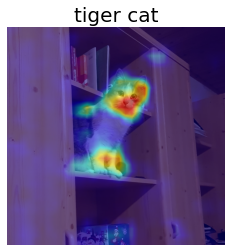

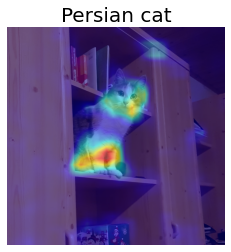

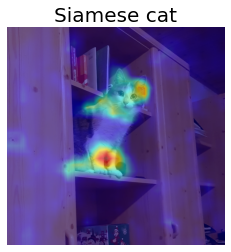

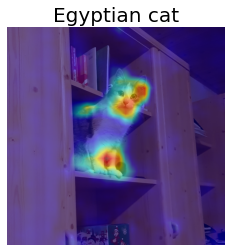

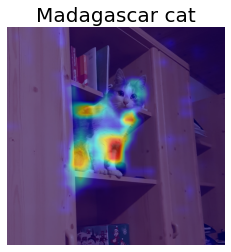

In [12]:
word = ' cat'
for key in categories:
    if word in key:
        j = categories.index(key)
        #print(categories[j],out[0,j].item(),j)
        showClass(j)

In [13]:

word = 'shipycxcvyxcv'
for key in categories:
    if word in key:
        j = categories.index(key)
        #print(categories[j],out[0,j].item(),j)
        showClass(j)